In [1]:
#Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing


from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss

#To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#Increase the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

#View all the dataframe
pd.set_option('display.max_columns',None)


In [2]:
heart_df = pd.read_csv("~/Downloads/heart.csv")

heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA & PROCESSING

In [3]:
#examine information in dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Check datatypes
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
#examine total Nan values for each column
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Determine number of unique values for each cloumn
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

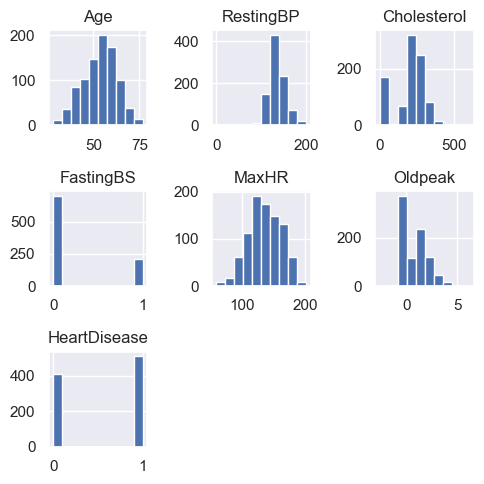

In [7]:
heart_df.hist()
plt.tight_layout()

In [8]:
heart_df.to_csv(r"./heart_df.csv",index=True)

In [9]:
#Normalize data

new_raw_data = pd.get_dummies(heart_df,columns =['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
new_raw_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [10]:
#Change column names
new_raw_data.rename(columns={'Sex_0': 'Male', 'Sex_1': 'Female','ChestPainType_0':'ChestPainType_ASY','ChestPainType_1':'ChestPainType_ATA','ChestPainType_2':'ChestPainType_NAP','ChestPainType_3':'ChestPainType_TA','RestingECG_0':'RestingECG_LVH','RestingECG_1':'RestingECG_Normal','RestingECG_2':'RestingECG_ST','ExerciseAngina_0':'ExerciseAngina_N','ExerciseAngina_1':'ExerciseAngina_Y','ST_Slope_0':'ST_Slope_Down','ST_Slope_1':'ST_Slope_Flat','ST_Slope_2':'ST_Slope_Up'}, inplace=True)
new_raw_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [11]:
#Look at Heart disease outcome value count
heart_disease_count = new_raw_data['HeartDisease'].value_counts()
heart_disease_count

1    508
0    410
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'Heart Disease Outcome Distribution')

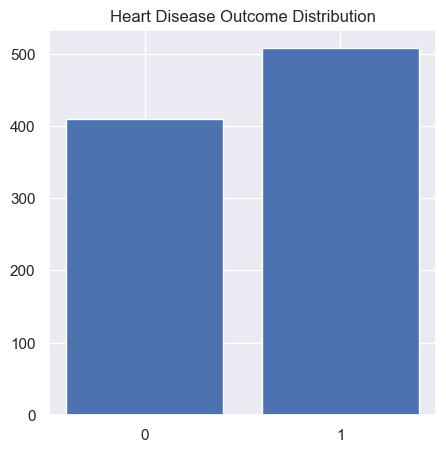

In [40]:
plt.bar(x = heart_disease_count.index, height = heart_disease_count, tick_label = ['1', '0'])
plt.title('Heart Disease Outcome Distribution')

In [13]:
#Split data into labels and features
y=new_raw_data['HeartDisease']

X=new_raw_data.drop(columns= ['HeartDisease'])

In [14]:
#Review the X variable DataFrame
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [15]:
#Check balance of target heartdisease value
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [16]:
#Split processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


In [17]:
#Create standard scaler instance
scaler= StandardScaler()

In [18]:
#Fit the standardScaler with training data
X_scaler = scaler.fit(X_train)

In [19]:
#Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled[0])

[-1.116200 -0.705742 -0.182317 -0.546914 -0.684584 1.586322 -0.521629
 0.521629 0.928948 -0.470423 -0.544812 -0.236886 1.956770 -1.209581
 -0.498296 -1.237350 1.237350 -0.236886 0.983783 -0.884055]


# Analyze correlations between features

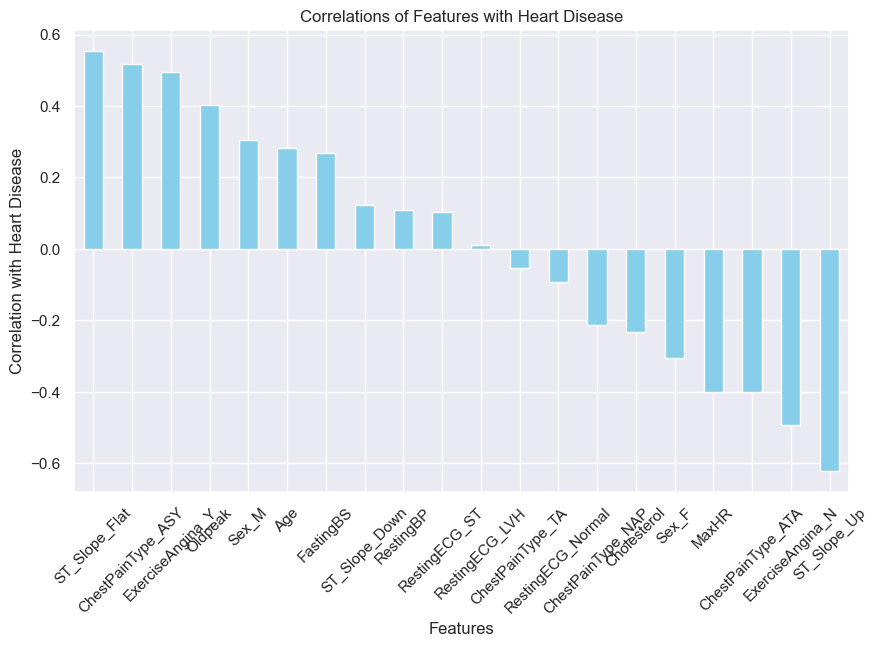

In [20]:

# Calculate correlations
correlation_matrix = new_raw_data.corr()

# Extract correlations with the target variable
correlations_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
correlations_with_target.drop('HeartDisease').plot(kind='bar', color='skyblue')
plt.title('Correlations of Features with Heart Disease')
plt.xlabel('Features')
plt.ylabel('Correlation with Heart Disease')
plt.xticks(rotation=45)
plt.show()


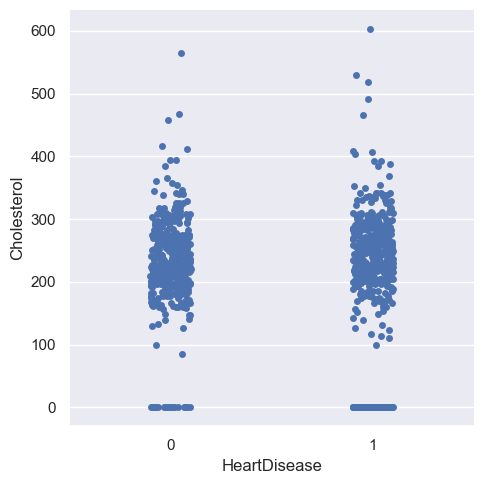

In [21]:
# To see how well Cholesterol correlates with diagnosis of heart disease, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'HeartDisease', y = 'Cholesterol', data = new_raw_data)


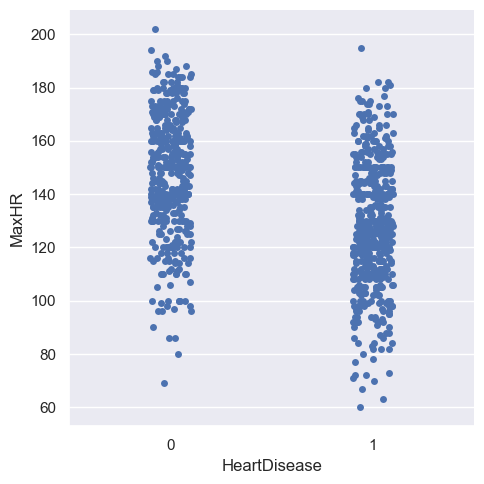

In [22]:
# To see how well max hr correlates with diagnosis of heart disease, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'HeartDisease', y = 'MaxHR', data = new_raw_data)


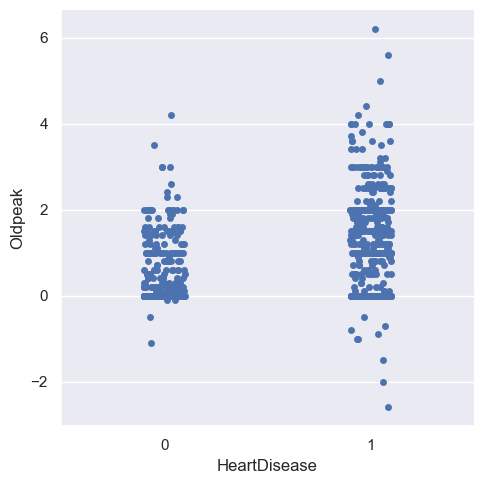

In [23]:
# To see how well age correlates with diagnosis of heart disease, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'HeartDisease', y = 'Oldpeak', data = new_raw_data)


# TRAIN AND EVALUATE OPTIMIZATION #2

In [24]:
#Create Randomforestclassifier model 

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the randomforestclassifier model
# Assign a random_state parameter of 1 to the model
 #For the front end
classifier_2 = RandomForestClassifier (n_estimators=25,random_state=1)

# Fit the model using training data
classifier_2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [27]:
# Make a prediction using the testing data
predictions= classifier_2.predict(X_test)

In [28]:
#calculate balanced score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions)

0.8982800982800982

In [29]:
#Display confused matix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 65,   9],
       [  9, 101]])

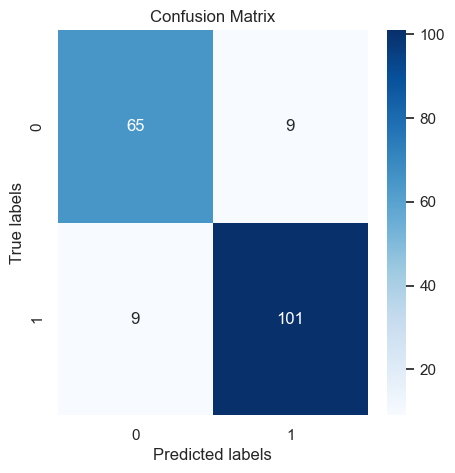

In [30]:
#visualize confused matirx
c_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Evaluate the model with Confusion Matrix and accuracy score
c_matrix = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

accu_score = accuracy_score(y_test, predictions)

In [32]:
#Generate matrix model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,65,9
Actual 1,9,101


In [33]:
#Display classificarion report Additional insights
print ("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.92      0.92      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



# Create Visualizations based on RandomForestClassifier model( best accuracy score of 90%)

In [34]:
#Feature Importance
#Random forest in sklearn will automatically calculate feature importance
importances=classifier_2.feature_importances_

#sort features by their importance
sorted(zip(classifier_2.feature_importances_,X.columns),reverse=True)



[(0.1291070585634779, 'ST_Slope_Flat'),
 (0.10298559242970766, 'MaxHR'),
 (0.10261720648152131, 'Cholesterol'),
 (0.10228892365165569, 'ChestPainType_ASY'),
 (0.0976150122114423, 'Oldpeak'),
 (0.08085817483216229, 'Age'),
 (0.07935131519672495, 'ST_Slope_Up'),
 (0.07633113626850654, 'RestingBP'),
 (0.05391179084199336, 'ExerciseAngina_Y'),
 (0.038339471862122075, 'ExerciseAngina_N'),
 (0.02737469863626603, 'Sex_M'),
 (0.021505887065585063, 'ChestPainType_ATA'),
 (0.017173413798090502, 'Sex_F'),
 (0.01670728735640156, 'FastingBS'),
 (0.013225996715153756, 'RestingECG_LVH'),
 (0.010522033068957264, 'ChestPainType_NAP'),
 (0.009688077482614075, 'RestingECG_ST'),
 (0.00803956715595136, 'RestingECG_Normal'),
 (0.006539299120540436, 'ST_Slope_Down'),
 (0.005818057261125807, 'ChestPainType_TA')]

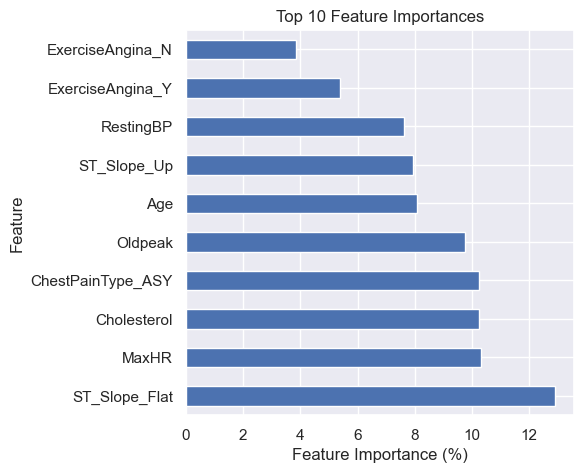

In [35]:
#Display Feature Importance bar graph

feature_importances = pd.Series(classifier_2.feature_importances_, index=X.columns)
importances_percentages = feature_importances * 100

# Selecting only the top 10 feature importances
top_10_feature_importances = importances_percentages.nlargest(10)

# Plotting
top_10_feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

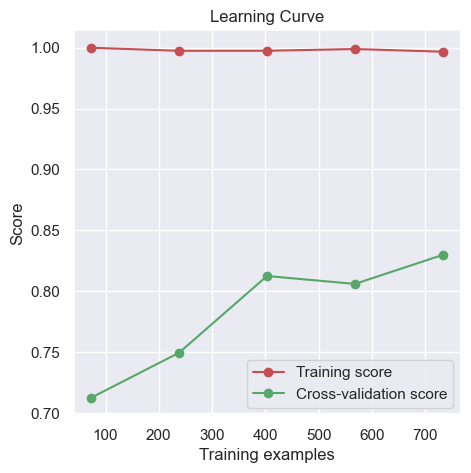

In [39]:
from sklearn.model_selection import learning_curve
#Learning curve instance
train_sizes, train_scores, test_scores = learning_curve(classifier_2, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


# EXPORT RESULTS TO CSV FOR TABLEAU

In [37]:
 heart_df.to_csv(r"./heart_df.csv",index=True)